In [1]:
import torch
import numpy as np
from ANN_model import Features12_NN
from Dataset import Features12_dataset
from Utils import loss_plot
from torch.utils.data import DataLoader
from Train import train_model

In [2]:
BATCH_SIZE = 100
RANDOM_STATE = 42

X = np.load('Numeric_feature_dataset/features12_norm_train.npy')
y = np.load('Numeric_feature_dataset/target_train.npy')
train_dataset = Features12_dataset(X, y, train=True, random_state=RANDOM_STATE)
test_dataset = Features12_dataset(X, y, train=False, random_state=RANDOM_STATE)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True)

In [3]:
model = Features12_NN()
model_trained, trainloss, testloss = train_model(model, train_loader, test_loader, num_epochs=300, lr=0.01, weight_decay=1e-2, factor=0.3, min_lr=1e-6, patience=30)

cuda is available
[Epoch 1/300] train_loss: 1.330, test_loss: 0.677 | train_mape: 43.00, test_mape: 29.39
[Epoch 2/300] train_loss: 0.889, test_loss: 0.597 | train_mape: 38.90, test_mape: 28.92
[Epoch 3/300] train_loss: 0.796, test_loss: 0.560 | train_mape: 36.88, test_mape: 28.82
[Epoch 4/300] train_loss: 0.714, test_loss: 0.489 | train_mape: 35.26, test_mape: 27.07
[Epoch 5/300] train_loss: 0.586, test_loss: 0.342 | train_mape: 33.58, test_mape: 25.61
[Epoch 6/300] train_loss: 0.552, test_loss: 0.399 | train_mape: 32.38, test_mape: 25.02
[Epoch 7/300] train_loss: 0.475, test_loss: 0.331 | train_mape: 31.21, test_mape: 24.36
[Epoch 8/300] train_loss: 0.466, test_loss: 0.420 | train_mape: 30.32, test_mape: 23.78
[Epoch 9/300] train_loss: 0.473, test_loss: 0.389 | train_mape: 29.66, test_mape: 23.65
[Epoch 10/300] train_loss: 0.477, test_loss: 0.502 | train_mape: 29.20, test_mape: 23.69
[Epoch 11/300] train_loss: 0.698, test_loss: 0.478 | train_mape: 29.32, test_mape: 23.97
[Epoch 12/30

KeyboardInterrupt: 

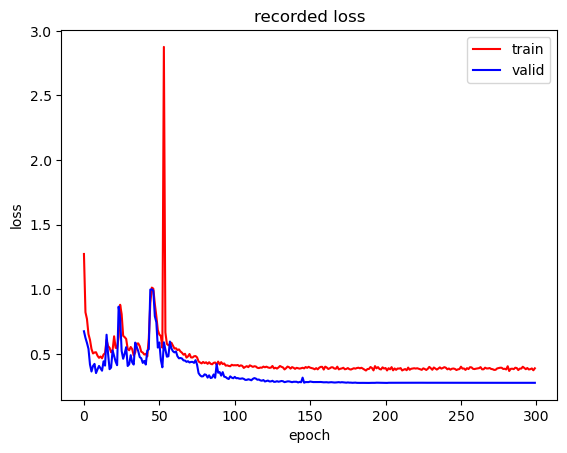

In [ ]:
loss_plot(trainloss, testloss)